# This model finds faces with CNN

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import face_recognition
from fastai.plots import *
import os
import itertools
import pickle

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [4]:
def find_all_images(root_dir):
    all_images = []
    for path, subdirs, files in os.walk(root_dir):
        for name in files:
            f_name = os.path.join(path, name)
            if f_name[-4:].lower() == ".jpg" or f_name[-4:].lower() == ".png":
                all_images.append(f_name)
    return all_images

In [5]:
PATH = "frames"

In [6]:
photos = find_all_images(f"{PATH}")


In [9]:
def find_face_locations_therest(all_imgs, counter = -1):
    # can change so that it would not be a list but rather a map
    therest_face_locations = {}
    for fname in all_imgs:
        if counter == 0: break
        counter-=1
        unknown_picture = face_recognition.load_image_file(fname)
#         therest_face_locations.append(face_recognition.face_locations(unknown_picture))
        therest_face_locations[fname] = (face_recognition.face_locations(unknown_picture))
    return therest_face_locations

In [7]:
def draw(face_locations, fil_name, index):
    
    im = np.array(Image.open(fil_name), dtype=np.uint8)

    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)
#     ph = p_loc
    for ind, i in enumerate(face_locations):

        x = i[3]
        y = i[0]
        w = i[1] - x
        h = i[2] - y
        # Create a Rectangle patch
        if ind == index:
            rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='g',facecolor='none')
        else:
            rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()
    

In [91]:
%time face_locations_therest = find_face_locations_therest(photos)

Wall time: 15min


In [92]:
len(face_locations_therest)

1177

In [98]:
with open('face_locations_therest.pickle', 'wb') as handle:
    pickle.dump(face_locations_therest, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with open('face_locations_therest.pickle', 'rb') as handle:
    face_locations_therest = pickle.load(handle)

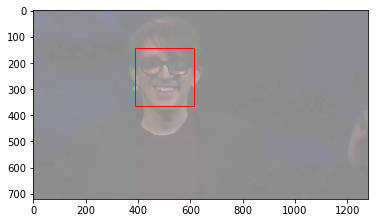

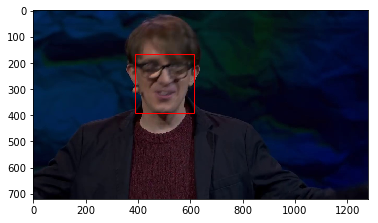

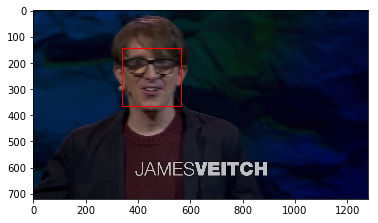

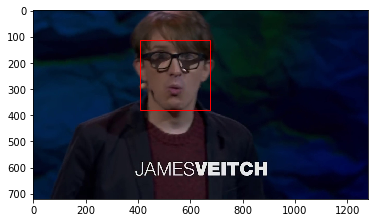

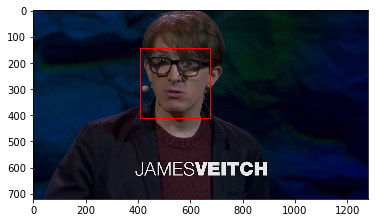

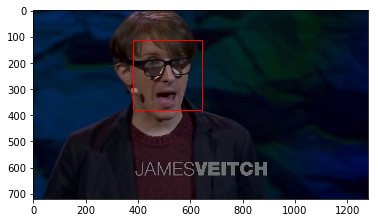

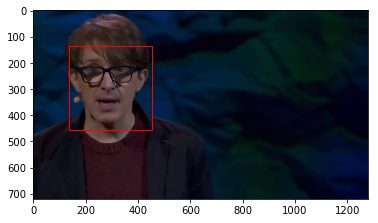

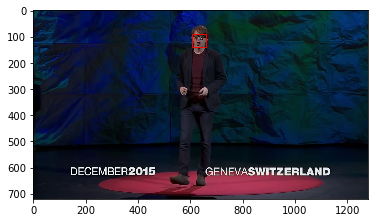

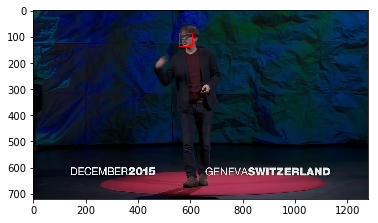

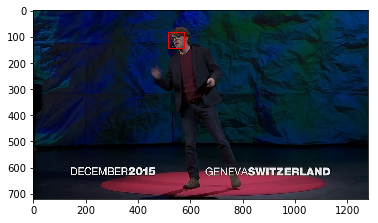

In [8]:
c = 0
for k,v in face_locations_therest.items():
    if len(v) == 1:
        c+=1
        draw(v, k, 1)
#         print(k,v)
    if c == 10: break